### Data Science 9/15/2021

### im inlove w sam fr

### 

In [ ]:
import pandas as pd                    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline                        

In [ ]:
train = pd.read_csv('titanic_train.csv')

In [ ]:
train.head(200)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


## Exploratory Data Analysis

<AxesSubplot:>

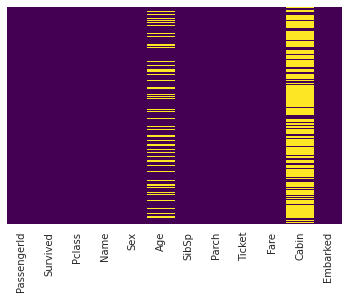

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# null = nothing

<AxesSubplot:xlabel='Survived', ylabel='count'>

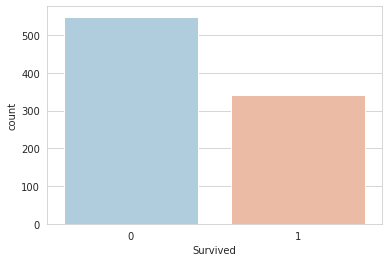

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')


<AxesSubplot:xlabel='Survived', ylabel='count'>

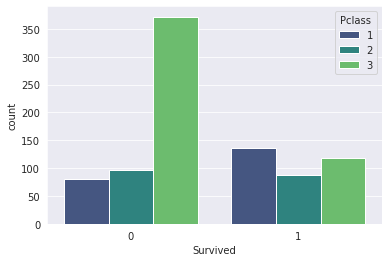

In [ ]:
sns.countplot(x="Survived",data=train,palette="viridis", hue="Pclass" )

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

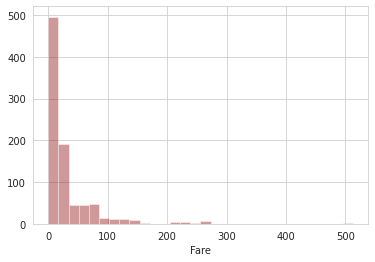

In [ ]:

sns.distplot(train['Fare'].dropna(),kde=False,color='darkred',bins=30)

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
### Average Ages Per Pclass

In [ ]:


train['Age'] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

<AxesSubplot:>

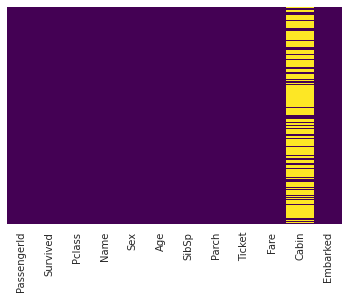

In [ ]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.drop("Cabin", inplace=True, axis=1)

<AxesSubplot:>

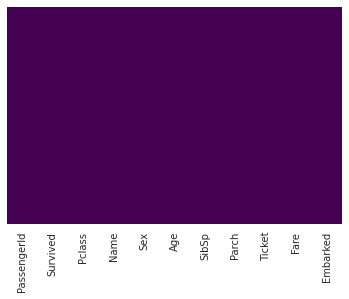

In [ ]:

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [ ]:

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
train = pd.concat([train,sex,embark],axis=1)

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['SibSp'], test_size=0.30, 
                                                    random_state=101)

# 0 or 1

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:

from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       192
           1       0.15      0.03      0.05        61
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2

    accuracy                           0.70       268
   macro avg       0.15      0.17      0.15       268
weighted avg       0.58      0.70      0.62       268

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision an

In [ ]:
# Greg 23 2 0 

# Greg --> LogisticRegression
# 0 1
# male 
# Greg 0



In [ ]:
for x in range(10):
    print("monkewaby")

wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab
wab


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
import tensorflow as tf

In [ ]:
tf.wab()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=20008831-a030-4e89-91a7-5067b0a1728f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>